# Capstone

The Aim is to see whether CO2 impacts global warming, and see how all these climate change factors will manifest in the future, comparing to COP warnings

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.api import VAR

## EDA

Data comes quite clean and only contains blank data depending on which metrics/year you go by. No need to fill, just selective engineering based on data information

In [7]:
temp = pd.read_csv("Data/temperature-anomaly.csv")
temp.head()

,Entity,Code,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
0,Global,NaN,1850,-0.417711,-0.246166,-0.589256
1,Global,NaN,1851,-0.233350,-0.054832,-0.411868
2,Global,NaN,1852,-0.229399,-0.049416,-0.409382
3,Global,NaN,1853,-0.270354,-0.110700,-0.430009
4,Global,NaN,1854,-0.291521,-0.150330,-0.432712


In [8]:
temp.drop(columns= ["Code"], inplace= True)

In [9]:
temp.head()

,Entity,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
0,Global,1850,-0.417711,-0.246166,-0.589256
1,Global,1851,-0.233350,-0.054832,-0.411868
2,Global,1852,-0.229399,-0.049416,-0.409382
3,Global,1853,-0.270354,-0.110700,-0.430009
4,Global,1854,-0.291521,-0.150330,-0.432712


In [10]:
temp = temp[temp["Entity"] == "Global"]
temp.head()

,Entity,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
0,Global,1850,-0.417711,-0.246166,-0.589256
1,Global,1851,-0.233350,-0.054832,-0.411868
2,Global,1852,-0.229399,-0.049416,-0.409382
3,Global,1853,-0.270354,-0.110700,-0.430009
4,Global,1854,-0.291521,-0.150330,-0.432712


In [11]:
temp.tail()

,Entity,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
170,Global,2020,0.922921,0.957543,0.888298
171,Global,2021,0.761906,0.798353,0.725458
172,Global,2022,0.801305,0.837353,0.765258
173,Global,2023,1.100313,1.138975,1.061651
174,Global,2024,1.231456,1.359094,1.103819


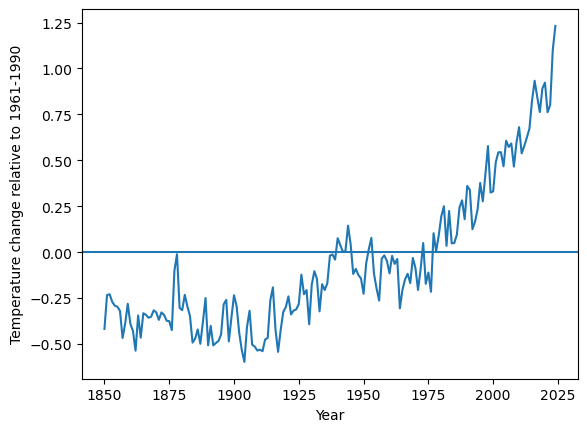

In [12]:
sns.lineplot(temp, x= "Year", y= "Global average temperature anomaly relative to 1961-1990")
plt.ylabel("Temperature change relative to 1961-1990")
plt.axhline()

In [13]:
co2 = pd.read_csv("Data/annual-co2-emissions-per-country.csv")

In [14]:
co2.head()

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0


In [15]:
co2.drop(columns= "Code", inplace= True)

In [16]:
co2["Annual CO2 emissions"] = co2["Annual CO₂ emissions"]

In [17]:
co2.drop(columns= "Annual CO₂ emissions", inplace= True)

In [18]:
co2.head()

,Entity,Year,Annual CO2 emissions
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


Having had a look at data, there is a world entity, meaning global averages

In [20]:
world_co2 = co2[co2["Entity"] == "World"]

Text(0.5, 1.0, 'Annual CO2 emissions')

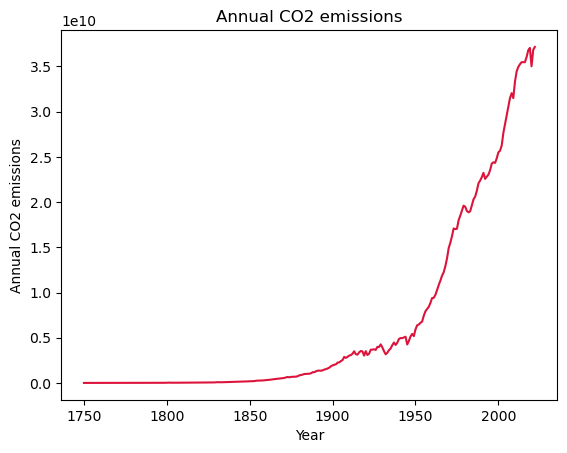

In [21]:
sns.lineplot(world_co2, x= "Year", y= "Annual CO2 emissions", color= "crimson")
plt.title("Annual CO2 emissions")

Filter by country then plotting

In [23]:
country_co2 = co2.groupby(["Entity", "Year"]).sum()
country_co2.head()

Annual CO2 emissions
Entity      Year                      
Afghanistan 1949               14656.0
            1950               84272.0
            1951               91600.0
            1952               91600.0
            1953              106256.0

Too many countries to handle, so I reduced to top20
Too many groupings so I just read through the first 35 nations to appear

In [25]:
co2[co2["Year"] == 2022].sort_values("Annual CO2 emissions", ascending= False).head(60)

,Entity,Year,Annual CO2 emissions
30041,World,2022,3.714979e+10
19662,Non-OECD (GCP),2022,2.433260e+10
1859,Asia,2022,2.177235e+10
2032,Asia (GCP),2022,1.910259e+10
29169,Upper-middle-income countries,2022,1.761673e+10
12749,High-income countries,2022,1.261407e+10
20986,OECD (GCP),2022,1.176784e+10
6256,China,2022,1.139678e+10
2305,Asia (excl. China and India),2022,7.545928e+09
19935,North America,2022,6.279689e+09


In [26]:
top20 = ["China", "North America", "India", "Russia", "Japan", "Indonesia", "Iran",\
         "Saudi Arabia", "South Korea", "Canada", "European Union (27)"]

I include europe as an entity, for it is a small collective of 27

In [28]:
country_co2.head()

Annual CO2 emissions
Entity      Year                      
Afghanistan 1949               14656.0
            1950               84272.0
            1951               91600.0
            1952               91600.0
            1953              106256.0

In [29]:
top20_df = country_co2.loc[top20]

<Axes: xlabel='Year', ylabel='Annual CO2 emissions'>

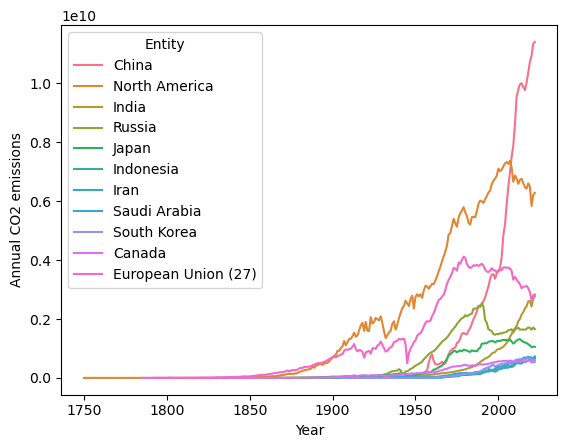

In [30]:
sns.lineplot(top20_df, x= "Year", y= "Annual CO2 emissions", hue= "Entity")

Also mainly for later

In [32]:
co2pc = pd.read_csv("Data/co-emissions-per-capita.csv")
co2pc.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685


In [33]:
co2pc.drop(columns= "Code", inplace= True)
co2pc.head()

,Entity,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.011266
2,Afghanistan,1951,0.012098
3,Afghanistan,1952,0.011946
4,Afghanistan,1953,0.013685


In [34]:
co2pc["Annual CO2 emissions per capita"] = co2pc["Annual CO₂ emissions (per capita)"]
co2pc.drop(columns= "Annual CO₂ emissions (per capita)", inplace= True)

In [35]:
co2pc.Entity.nunique()

231

<Axes: xlabel='Year', ylabel='Annual CO2 emissions per capita'>

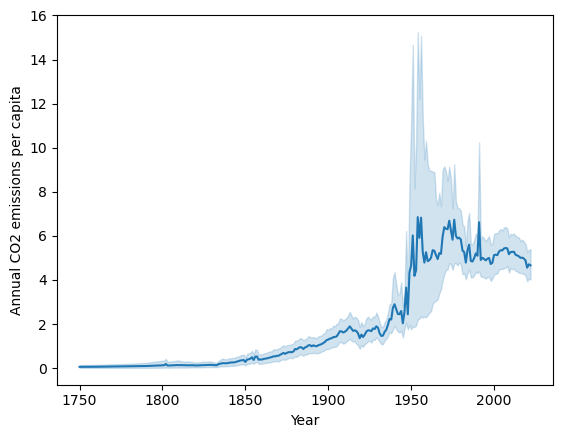

In [36]:
sns.lineplot(co2pc, x= "Year", y= "Annual CO2 emissions per capita")

This is total, we can have a look at individual increases

In [38]:
co2pc.Year = pd.to_datetime(co2pc["Year"], format= "%Y")

In [39]:
co2pc.head()

,Entity,Year,Annual CO2 emissions per capita
0,Afghanistan,1949-01-01,0.001992
1,Afghanistan,1950-01-01,0.011266
2,Afghanistan,1951-01-01,0.012098
3,Afghanistan,1952-01-01,0.011946
4,Afghanistan,1953-01-01,0.013685


In [40]:
co2pc["Year"] = co2pc["Year"].dt.strftime("%Y")
co2pc.head()

,Entity,Year,Annual CO2 emissions per capita
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.011266
2,Afghanistan,1951,0.012098
3,Afghanistan,1952,0.011946
4,Afghanistan,1953,0.013685


In [41]:
co2pc.head()

,Entity,Year,Annual CO2 emissions per capita
0,Afghanistan,1949,0.001992
1,Afghanistan,1950,0.011266
2,Afghanistan,1951,0.012098
3,Afghanistan,1952,0.011946
4,Afghanistan,1953,0.013685


In [42]:
co2pc[co2pc["Year"] == "2020"].sort_values("Annual CO2 emissions per capita").tail(20)

,Entity,Year,Annual CO2 emissions per capita
15850,Mongolia,2020,11.254686
23244,Taiwan,2020,11.409406
22190,South Korea,2020,11.527397
18518,Palau,2020,11.806878
14554,Luxembourg,2020,12.797711
12874,Kazakhstan,2020,13.461358
4876,Canada,2020,13.799503
25276,United States,2020,14.034053
18373,Oman,2020,14.400839
8913,Faroe Islands,2020,14.463158


This information is largely for later, regarding individual country input.

In [44]:
total_ghg = pd.read_csv("Data/total-ghg-emissions.csv")
total_ghg.head()

,Entity,Code,Year,Annual greenhouse gas emissions in CO₂ equivalents
0,Afghanistan,AFG,1850,7338819.0
1,Afghanistan,AFG,1851,7403982.5
2,Afghanistan,AFG,1852,7464157.0
3,Afghanistan,AFG,1853,7522431.5
4,Afghanistan,AFG,1854,7579209.5


In [45]:
total_ghg = total_ghg[total_ghg["Entity"] == "World"]

Text(0.5, 1.0, 'CO2 vs KYOTO CO2')

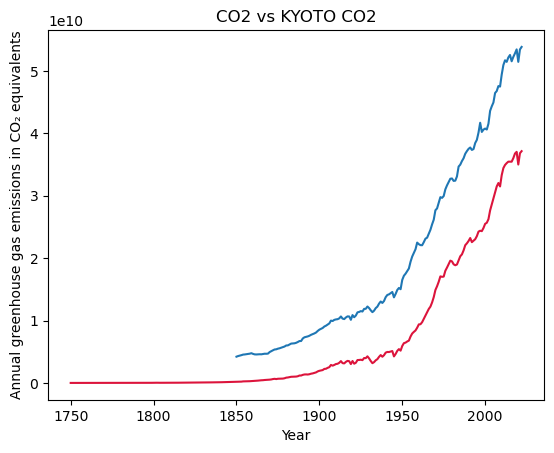

In [46]:
sns.lineplot(total_ghg, x= "Year", y= "Annual greenhouse gas emissions in CO₂ equivalents")
sns.lineplot(world_co2, x= "Year", y= "Annual CO2 emissions", color= "crimson")
plt.title("CO2 vs KYOTO CO2")

## Effects EDA

In [48]:
sea = pd.read_csv("Data/sea-level.csv")
sea.head()

,Entity,Code,Day,Global sea level according to Church and White (2011),Global sea level according to UHSLC,Global sea level as an average of Church and White (2011) and UHSLC data
0,World,OWID_WRL,1880-04-15,-183.31406,NaN,-183.31406
1,World,OWID_WRL,1880-07-15,-183.24739,NaN,-183.24739
2,World,OWID_WRL,1880-10-15,-174.14740,NaN,-174.14740
3,World,OWID_WRL,1881-01-15,-159.68073,NaN,-159.68073
4,World,OWID_WRL,1881-04-15,-172.41406,NaN,-172.41406


Clean the data to only have yearly data, no NAs and useful averages

In [50]:
sea.isna().sum()

Entity                                                                        0
Code                                                                          0
Day                                                                           0
Global sea level according to Church and White (2011)                        44
Global sea level according to UHSLC                                         359
Global sea level as an average of Church and White (2011) and UHSLC data      0
dtype: int64

In [51]:
sea.drop(columns= ["Code", "Global sea level according to Church and White (2011)", "Global sea level according to UHSLC"], inplace= True)

In [52]:
sea["Average sea level"] = sea["Global sea level as an average of Church and White (2011) and UHSLC data"]

In [53]:
sea.head()

,Entity,Day,Global sea level as an average of Church and White (2011) and UHSLC data,Average sea level
0,World,1880-04-15,-183.31406,-183.31406
1,World,1880-07-15,-183.24739,-183.24739
2,World,1880-10-15,-174.14740,-174.14740
3,World,1881-01-15,-159.68073,-159.68073
4,World,1881-04-15,-172.41406,-172.41406


In [54]:
sea.drop(columns= "Global sea level as an average of Church and White (2011) and UHSLC data", inplace= True)

In [55]:
sea.head()

,Entity,Day,Average sea level
0,World,1880-04-15,-183.31406
1,World,1880-07-15,-183.24739
2,World,1880-10-15,-174.14740
3,World,1881-01-15,-159.68073
4,World,1881-04-15,-172.41406


In [56]:
world_sea = sea[sea["Entity"] == "World"]

In [57]:
world_sea.Day = pd.to_datetime(world_sea.Day)

In [58]:
world_sea["Year"] = world_sea["Day"].dt.strftime("%Y")

In [59]:
world_sea.head()

,Entity,Day,Average sea level,Year
0,World,1880-04-15,-183.31406,1880
1,World,1880-07-15,-183.24739,1880
2,World,1880-10-15,-174.14740,1880
3,World,1881-01-15,-159.68073,1881
4,World,1881-04-15,-172.41406,1881


In [60]:
world_sea.drop(columns= "Day", inplace= True)

In [61]:
world_sea.head()

,Entity,Average sea level,Year
0,World,-183.31406,1880
1,World,-183.24739,1880
2,World,-174.14740,1880
3,World,-159.68073,1881
4,World,-172.41406,1881


In [62]:
world_sea.head()

,Entity,Average sea level,Year
0,World,-183.31406,1880
1,World,-183.24739,1880
2,World,-174.14740,1880
3,World,-159.68073,1881
4,World,-172.41406,1881


In [63]:
world_sea = pd.DataFrame(world_sea.groupby("Year")["Average sea level"].mean())

In [64]:
world_sea.head()

,Average sea level
Year,
1880,-180.236283
1881,-173.039065
1882,-191.580733
1883,-190.455727
1884,-166.597397


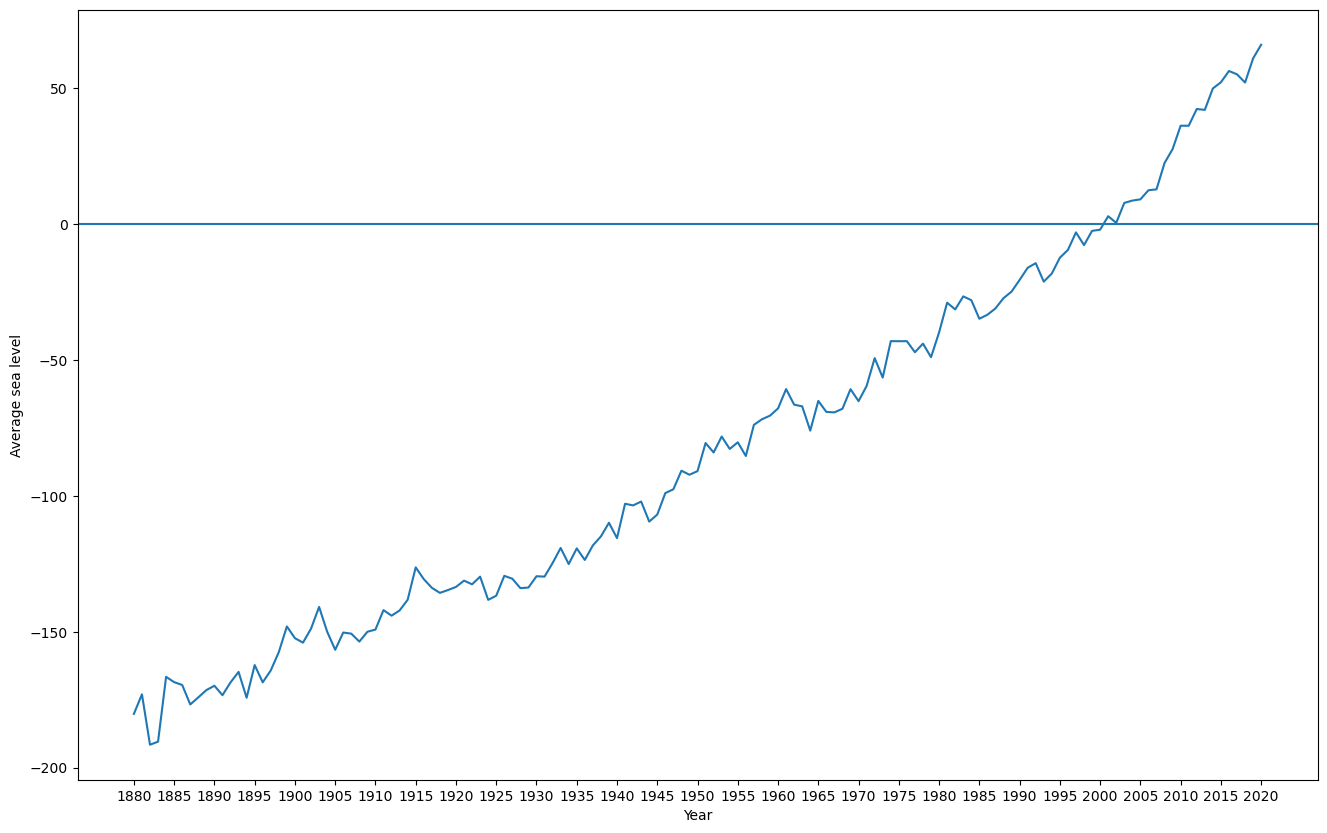

In [65]:
plt.figure(figsize= (16, 10))
sns.lineplot(world_sea, x= "Year", y= "Average sea level")
plt.axhline()
plt.xticks(np.arange(0, len(world_sea.index), 5));
# GPT to show every 5 x points

Realised I should do the individual metrics, such as sea level and temperature before showing the disaster metrics

In [67]:
av_temp = pd.read_csv("Data/average-monthly-surface-temperature.csv")
av_temp.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032477,11.327657
1,Afghanistan,AFG,1940,1940-02-15,-0.733529,11.327657
2,Afghanistan,AFG,1940,1940-03-15,1.999109,11.327657
3,Afghanistan,AFG,1940,1940-04-15,10.199730,11.327657
4,Afghanistan,AFG,1940,1940-05-15,17.942080,11.327657


In [68]:
av_temp.drop(columns= ["Code"], inplace= True)

In [69]:
av_temp.head()

,Entity,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,1940,1940-01-15,-2.032477,11.327657
1,Afghanistan,1940,1940-02-15,-0.733529,11.327657
2,Afghanistan,1940,1940-03-15,1.999109,11.327657
3,Afghanistan,1940,1940-04-15,10.199730,11.327657
4,Afghanistan,1940,1940-05-15,17.942080,11.327657


In [70]:
world_temp = av_temp[av_temp["Entity"] == "World"]

In [71]:
world_temp.head()

,Entity,year,Day,Average surface temperature,Average surface temperature.1
193865,World,1940,1940-01-15,11.496590,13.685222
193866,World,1940,1940-02-15,11.872087,13.685222
193867,World,1940,1940-03-15,12.523915,13.685222
193868,World,1940,1940-04-15,13.756819,13.685222
193869,World,1940,1940-05-15,14.745457,13.685222


Text(0.5, 1.0, 'MinMAx Average Global Temperature')

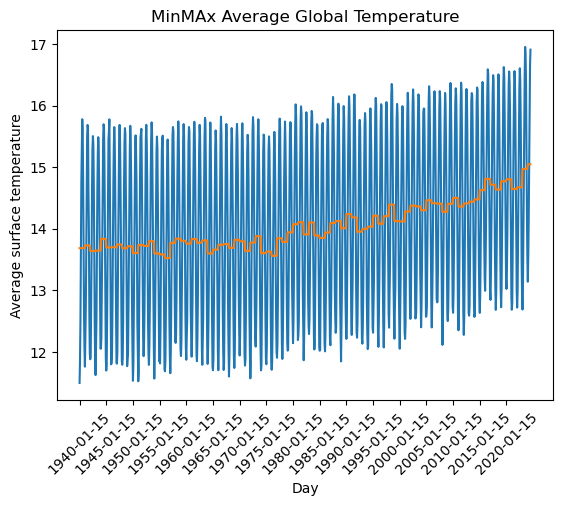

In [72]:
sns.lineplot(world_temp, x= "Day", y= "Average surface temperature")
sns.lineplot(world_temp, x= "Day", y= "Average surface temperature.1")
plt.xticks(np.arange(0, len(world_temp.index), 60), rotation= (45));
plt.title("MinMAx Average Global Temperature")

The 2 average temperatures are the max and min temperature that month, respectively

In [74]:
max_temp = av_temp.groupby(["Entity", "year"])["Average surface temperature.1"].max()

<Axes: ylabel='Entity,year'>

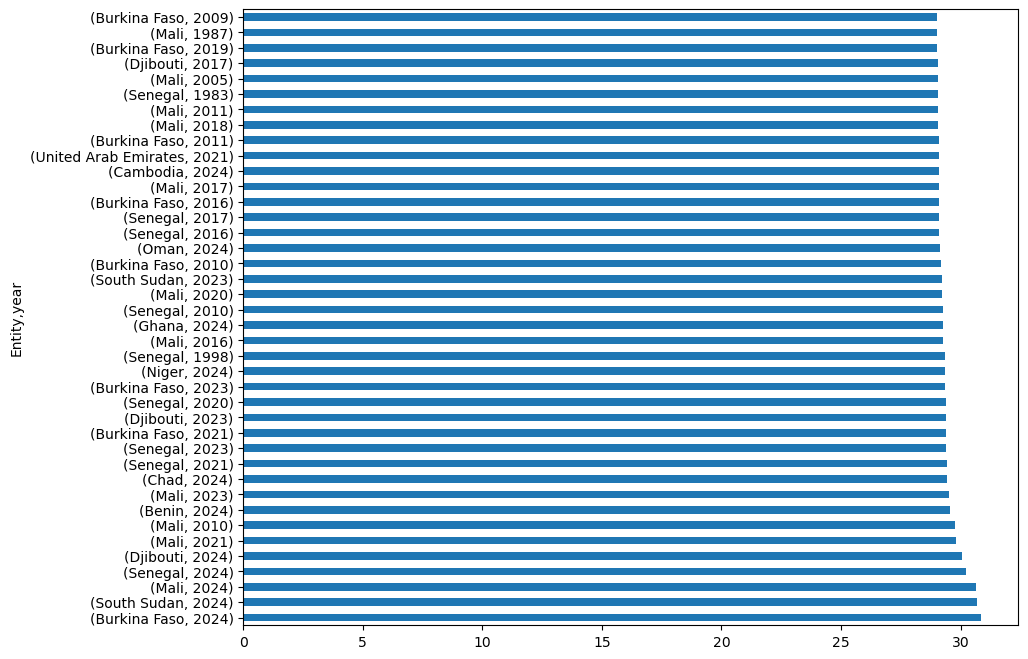

In [75]:
plt.figure(figsize= (10, 8))
max_temp.sort_values(ascending= False).head(40).plot(kind= "barh")

Again, this data will be used later

In [77]:
disaster = pd.read_csv("Data/number-of-natural-disaster-events.csv")
disaster.head()

,Entity,Code,Year,Disasters
0,All disasters,NaN,1900,6
1,All disasters,NaN,1901,1
2,All disasters,NaN,1902,10
3,All disasters,NaN,1903,12
4,All disasters,NaN,1904,4


In [78]:
disaster.drop(columns= "Code")

,Entity,Year,Disasters
0,All disasters,1900,6
1,All disasters,1901,1
2,All disasters,1902,10
3,All disasters,1903,12
4,All disasters,1904,4
...,...,...,...
1139,Wildfire,2020,10
1140,Wildfire,2021,19
1141,Wildfire,2022,16
1142,Wildfire,2023,16


In [79]:
world_disaster = disaster[disaster["Entity"] == "All disasters"]

In [80]:
world_disaster.tail()

,Entity,Code,Year,Disasters
120,All disasters,NaN,2020,407
121,All disasters,NaN,2021,441
122,All disasters,NaN,2022,440
123,All disasters,NaN,2023,410
124,All disasters,NaN,2024,83


<Axes: xlabel='Year', ylabel='Disasters'>

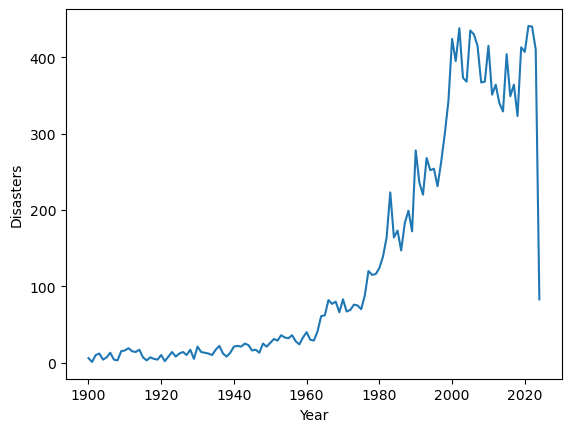

In [81]:
sns.lineplot(world_disaster, x= "Year", y= "Disasters")

<Axes: xlabel='Year', ylabel='Disasters'>

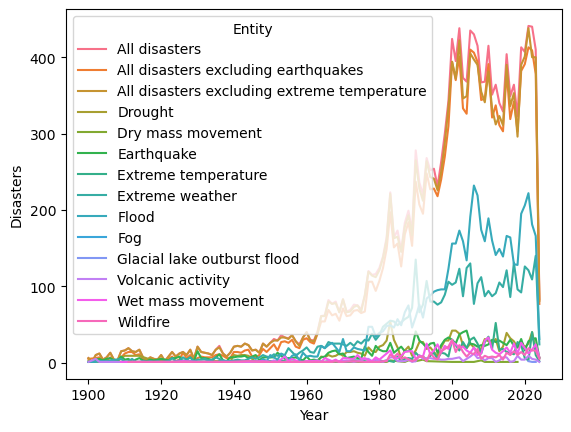

In [82]:
sns.lineplot(disaster, x= "Year", y= "Disasters", hue= "Entity")

In [83]:
disaster.Entity.unique()

array(['All disasters', 'All disasters excluding earthquakes',
       'All disasters excluding extreme temperature', 'Drought',
       'Dry mass movement', 'Earthquake', 'Extreme temperature',
       'Extreme weather', 'Flood', 'Fog', 'Glacial lake outburst flood',
       'Volcanic activity', 'Wet mass movement', 'Wildfire'], dtype=object)

Removing unnecessary disasters, retaining those that are more tied with climate change

In [85]:
disaster.drop(columns= "Code", inplace= True)

In [86]:
disaster = disaster[disaster["Entity"].isin(["Drought", "Earthquake", "Extreme temperature", "Extreme weather", "Flood", "Wildfire"])]

In [87]:
disaster.head()

,Entity,Year,Disasters
374,Drought,1900,2
375,Drought,1903,1
376,Drought,1906,1
377,Drought,1907,1
378,Drought,1910,9


<Axes: xlabel='Year', ylabel='Disasters'>

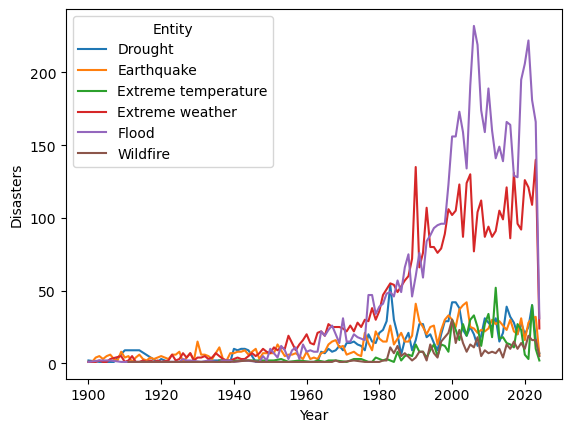

In [88]:
sns.lineplot(disaster, x= "Year", y= "Disasters", hue= "Entity")

## Modelling

Let's have a simple look through ARIMA regarding just he rising temp

In [91]:
temp.head()

,Entity,Year,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
0,Global,1850,-0.417711,-0.246166,-0.589256
1,Global,1851,-0.233350,-0.054832,-0.411868
2,Global,1852,-0.229399,-0.049416,-0.409382
3,Global,1853,-0.270354,-0.110700,-0.430009
4,Global,1854,-0.291521,-0.150330,-0.432712


Convert to date time and make index

In [93]:
temp.Year = pd.to_datetime(temp.Year, format= "%Y")

In [94]:
temp.set_index("Year", inplace= True)

In [95]:
# Going to drop Entity, since it is all the same
temp.drop(columns= "Entity", inplace= True)

In [96]:
temp.head()

,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
Year,,,
1850-01-01,-0.417711,-0.246166,-0.589256
1851-01-01,-0.233350,-0.054832,-0.411868
1852-01-01,-0.229399,-0.049416,-0.409382
1853-01-01,-0.270354,-0.110700,-0.430009
1854-01-01,-0.291521,-0.150330,-0.432712


<Axes: xlabel='Year', ylabel='Global average temperature anomaly relative to 1961-1990'>

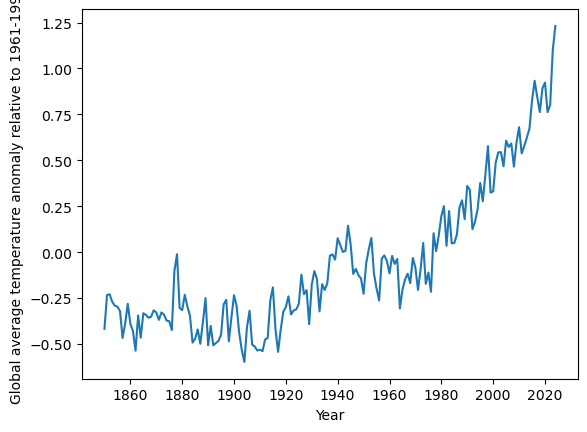

In [97]:
sns.lineplot(temp, x= temp.index, y= temp["Global average temperature anomaly relative to 1961-1990"])

In [98]:
def plot_diff(v):
    fig, axs = plt.subplots(3, 1, figsize=(10, 6))
    axs[0].plot(v)
    axs[1].plot(v.diff())
    axs[2].plot(v.diff().diff())
# Function we used in class to plot how many diffs we should use

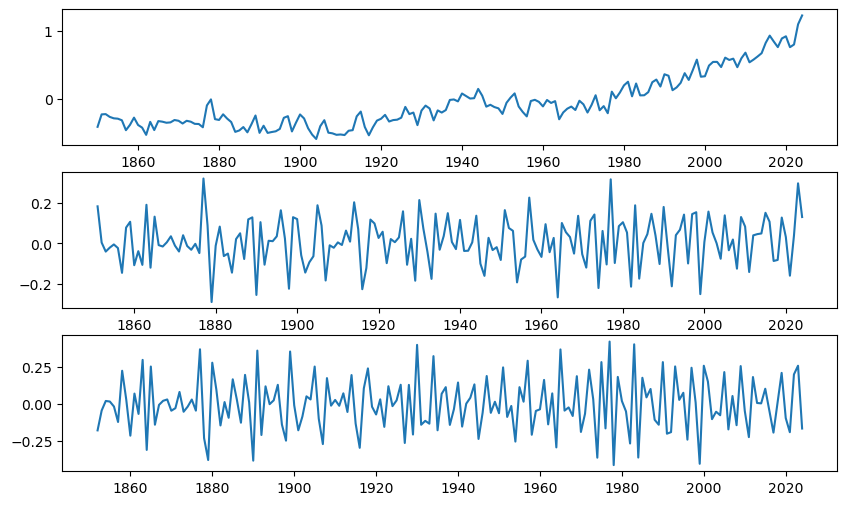

In [99]:
plot_diff(temp["Global average temperature anomaly relative to 1961-1990"])

In [100]:
decomp = seasonal_decompose(temp["Global average temperature anomaly relative to 1961-1990"].diff().dropna(), period= 1)

This allows for the index to take yearly measures

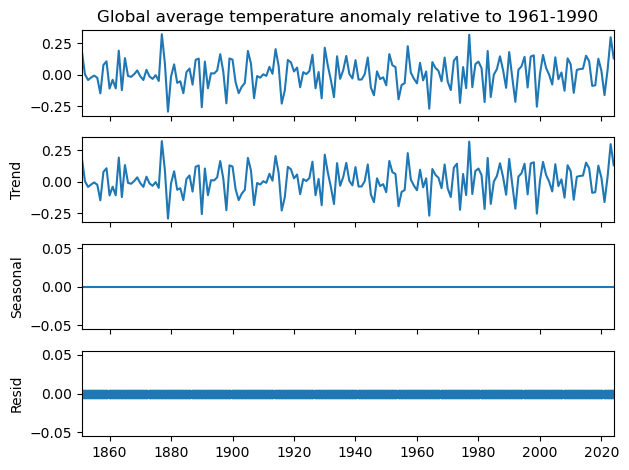

In [102]:
decomp.plot();

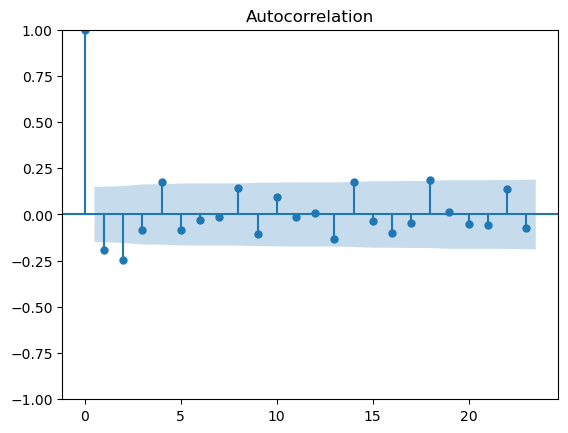

In [103]:
plot_acf(temp["Global average temperature anomaly relative to 1961-1990"].diff().dropna());

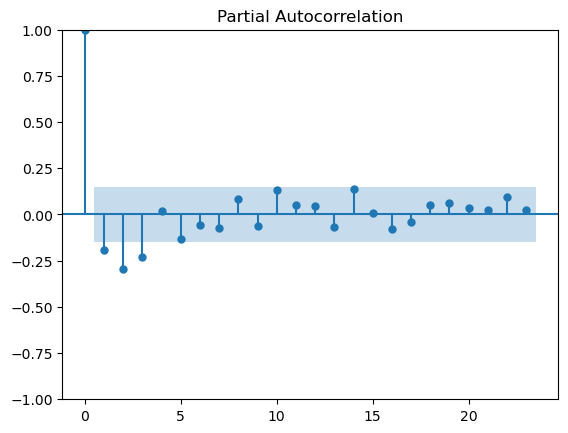

In [104]:
plot_pacf(temp["Global average temperature anomaly relative to 1961-1990"].diff().dropna());

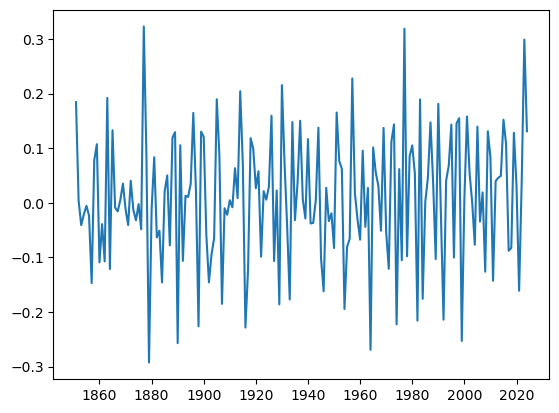

In [105]:
plt.plot(temp["Global average temperature anomaly relative to 1961-1990"].diff())

In [106]:
adf, pval, *_ = adfuller(temp["Global average temperature anomaly relative to 1961-1990"].diff().dropna())
pval

3.189573413662687e-22

These results thus far from the decomp, acf, pacf and adfuller, all point to good ARIMA modelling. The data, with one differential, seems ideal.

In [108]:
y_train, y_test = train_test_split(temp["Global average temperature anomaly relative to 1961-1990"], test_size= 0.1, shuffle= False)

In [109]:
y_train.head()

Year
1850-01-01   -0.417711
1851-01-01   -0.233350
1852-01-01   -0.229399
1853-01-01   -0.270354
1854-01-01   -0.291521
Name: Global average temperature anomaly relative to 1961-1990, dtype: float64

### ARIMA

In [111]:
model = ARIMA(y_train, order= (5, 1, 4)).fit()

C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible 

In [112]:
model.aic

-245.3893850306514

In [113]:
y_pred = model.predict(start= y_test.index[0], end= y_test.index[-1])

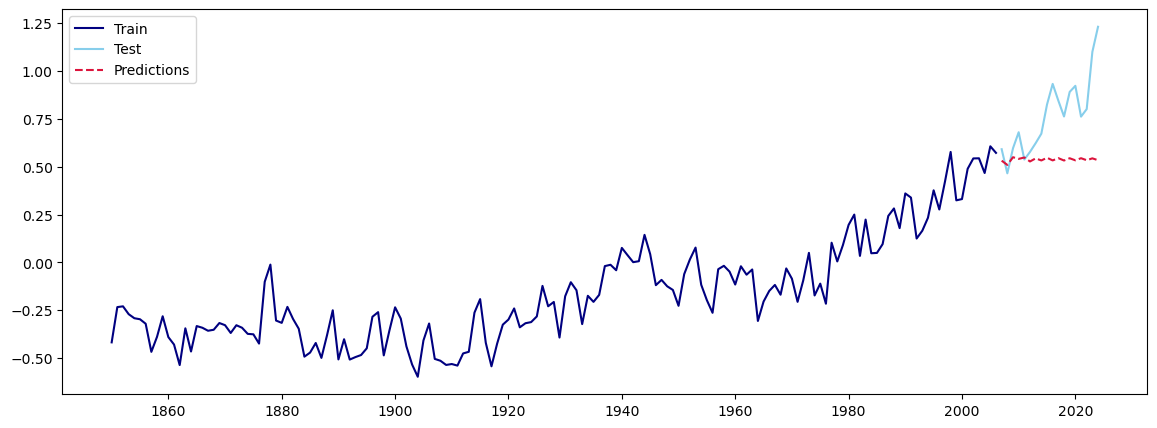

In [114]:
plt.figure(figsize= (14, 5))
plt.plot(y_train, c= "navy", label= "Train")
plt.plot(y_test, c= "skyblue", label= "Test")
plt.plot(y_pred, c= "crimson", label= "Predictions", linestyle= "--")
plt.legend()

In [115]:
mse = mean_squared_error(y_test, y_pred)
mse, np.sqrt(mse)

(0.09011412250732172, 0.30019014392101834)

Considering that we predict a upward trend, we can see ARIMA are completely incapable of handling this data, and that this data is non-linear, meaning that there are probaly many factors contributing to the trend of this graph directly

However, take into account the important start dates of 1900 and 1960 for industrialisation

In [118]:
temp.head()

,Global average temperature anomaly relative to 1961-1990,Upper bound of the annual temperature anomaly (95% confidence interval),Lower bound of the annual temperature anomaly (95% confidence interval)
Year,,,
1850-01-01,-0.417711,-0.246166,-0.589256
1851-01-01,-0.233350,-0.054832,-0.411868
1852-01-01,-0.229399,-0.049416,-0.409382
1853-01-01,-0.270354,-0.110700,-0.430009
1854-01-01,-0.291521,-0.150330,-0.432712


In [119]:
temp_1900 = temp.iloc[50:-1]

In [120]:
temp_1960 = temp.iloc[110:-1]

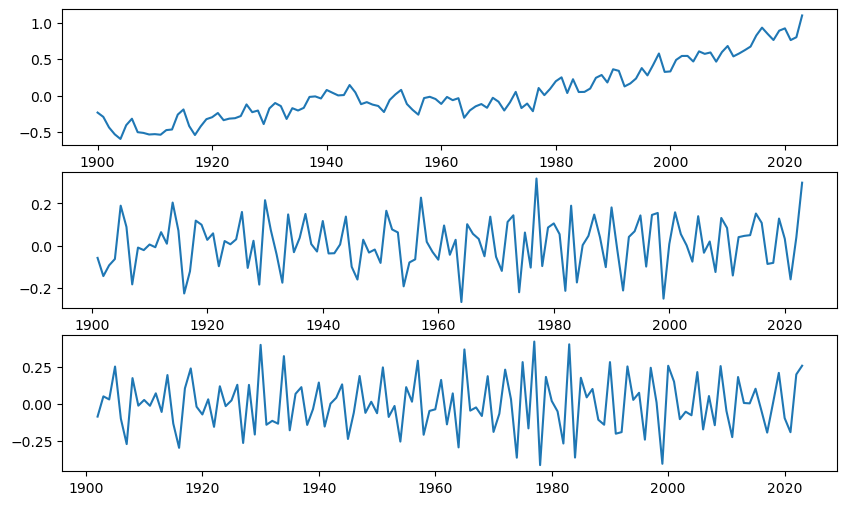

In [121]:
plot_diff(temp_1900["Global average temperature anomaly relative to 1961-1990"])

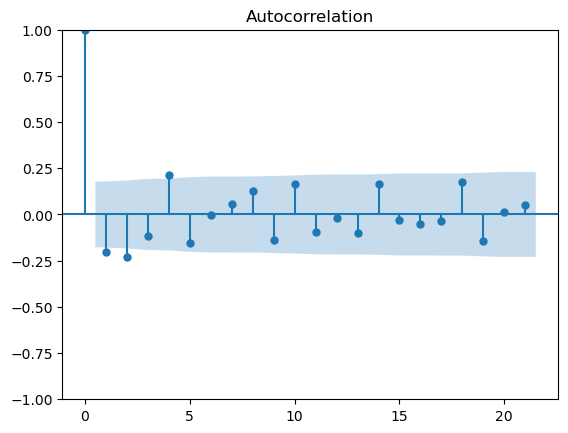

In [122]:
plot_acf(temp_1900["Global average temperature anomaly relative to 1961-1990"].diff().dropna());

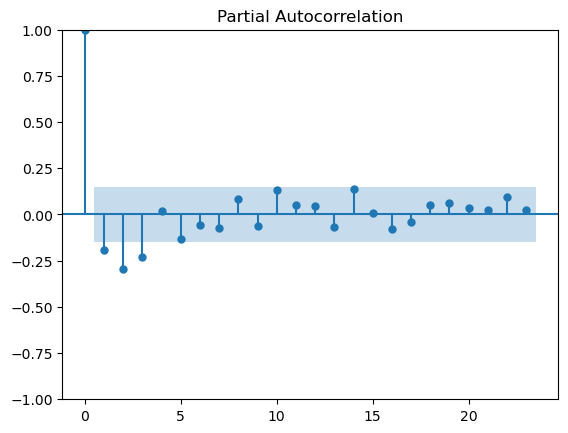

In [123]:
plot_pacf(temp["Global average temperature anomaly relative to 1961-1990"].diff().dropna());

In [124]:
y_train, y_test = train_test_split(temp_1900["Global average temperature anomaly relative to 1961-1990"], test_size= 0.1, shuffle= False)

In [125]:
p_array = np.arange(15)
q_array = np.arange(15)
d = 1

In [126]:
results = []
for p in p_array:
    for q in q_array:
        model = ARIMA(y_train, order= (p, d, q)).fit()
        results.append((p, q, model.aic))

C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

In [127]:
results = pd.DataFrame(results, columns= ["p", "q", "aic"])
results

,p,q,aic
0,0,0,-155.416313
1,0,1,-165.926922
2,0,2,-169.716395
3,0,3,-167.932963
4,0,4,-173.702469
...,...,...,...
220,14,10,-149.032913
221,14,11,-147.454715
222,14,12,-148.873093
223,14,13,-148.109218


In [128]:
results[results["aic"] > 0].sort_values("aic").head()

,p,q,aic


In [129]:
results[results["aic"] < 0].sort_values("aic", ascending= False).head()

,p,q,aic
221,14,11,-147.454715
219,14,9,-147.735978
218,14,8,-148.068952
223,14,13,-148.109218
222,14,12,-148.873093


In [130]:
model = ARIMA(y_train, order= (14, 1, 11)).fit()

C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood o

In [131]:
model.aic

-147.45471476906067

In [132]:
y_pred = model.predict(start= y_test.index[0], end= y_test.index[-1])

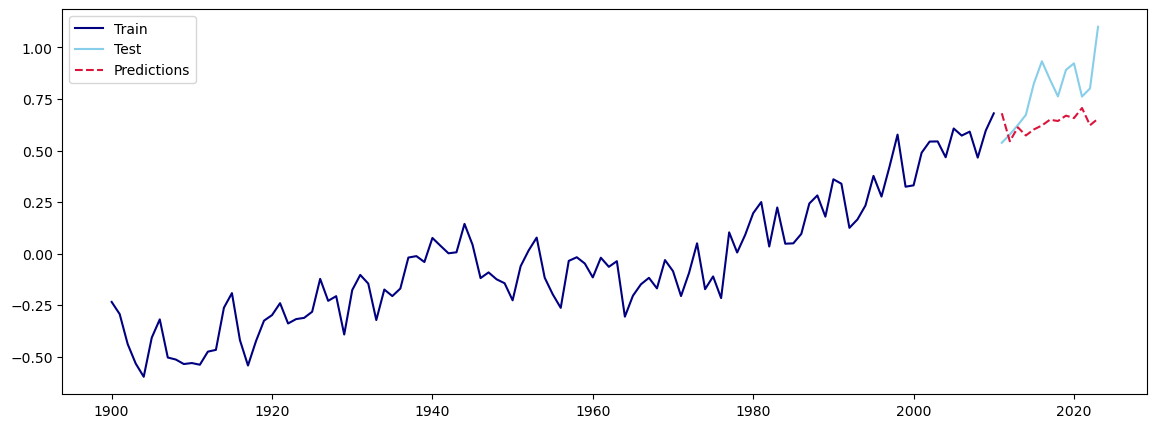

In [133]:
plt.figure(figsize= (14, 5))
plt.plot(y_train, c= "navy", label= "Train")
plt.plot(y_test, c= "skyblue", label= "Test")
plt.plot(y_pred, c= "crimson", label= "Predictions", linestyle= "--")
plt.legend()

In [134]:
mse = mean_squared_error(y_test, y_pred)
mse, np.sqrt(mse)

(0.04493949457853551, 0.21198937373966534)

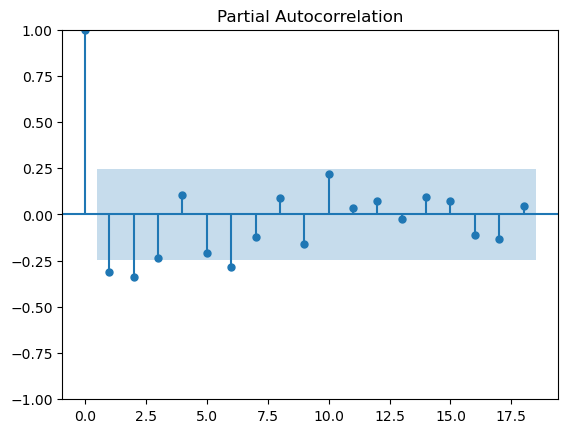

In [135]:
plot_pacf(temp_1960["Global average temperature anomaly relative to 1961-1990"].diff().dropna());

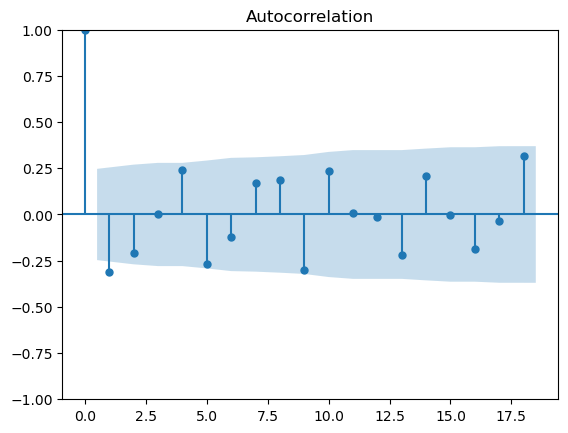

In [136]:
plot_acf(temp_1960["Global average temperature anomaly relative to 1961-1990"].diff().dropna());

In [137]:
y_train, y_test = train_test_split(temp_1960["Global average temperature anomaly relative to 1961-1990"], test_size= 0.1, shuffle= False)

In [138]:
p_array = np.arange(15)
q_array = np.arange(15)
d = 1

In [139]:
results = []
for p in p_array:
    for q in q_array:
        model = ARIMA(y_train, order= (p, d, q)).fit()
        results.append((p, q, model.aic))

C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequenc

In [140]:
results = pd.DataFrame(results, columns= ["p", "q", "aic"])
results

,p,q,aic
0,0,0,-70.497831
1,0,1,-78.409771
2,0,2,-76.637725
3,0,3,-74.919834
4,0,4,-73.802884
...,...,...,...
220,14,10,-59.802017
221,14,11,5600.700823
222,14,12,5602.700776
223,14,13,5604.700475


In [141]:
results[results["aic"] > 0].sort_values("aic").head()

,p,q,aic
73,4,13,5584.701714
88,5,13,5586.701699
103,6,13,5588.701552
118,7,13,5590.701461
133,8,13,5592.700942


In [142]:
results[results["aic"] < 0].sort_values("aic", ascending= False).head()

,p,q,aic
224,14,14,-53.227716
209,13,14,-55.850972
194,12,14,-58.286455
149,9,14,-58.332241
179,11,14,-58.563330


In [143]:
model = ARIMA(y_train, order= (14, 1, 14)).fit()
model.aic

C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood o

-53.2277155491486

In [144]:
y_pred = model.predict(start= y_test.index[0], end= y_test.index[-1])

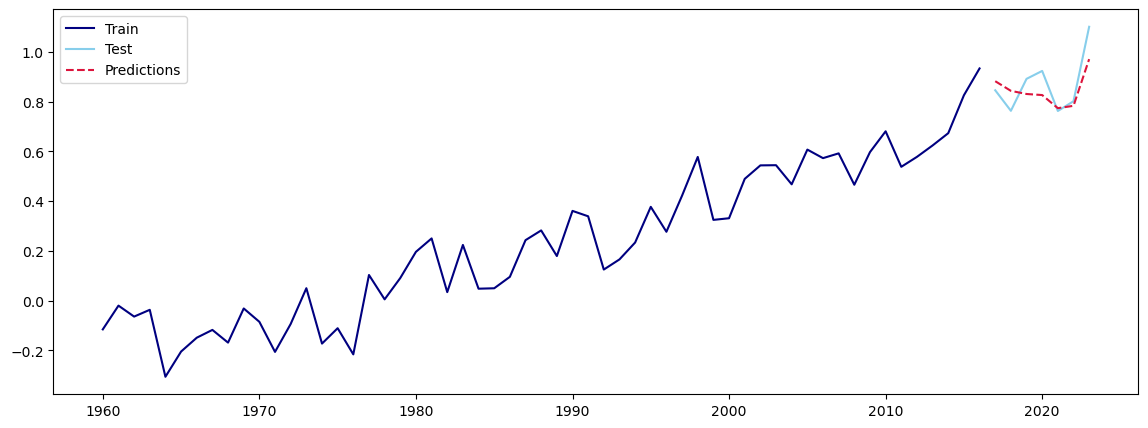

In [145]:
plt.figure(figsize= (14, 5))
plt.plot(y_train, c= "navy", label= "Train")
plt.plot(y_test, c= "skyblue", label= "Test")
plt.plot(y_pred, c= "crimson", label= "Predictions", linestyle= "--")
plt.legend()

In [146]:
mse = mean_squared_error(y_test, y_pred)
mse

0.00546261881613383

In [147]:
rmse = np.sqrt(mse)
rmse

0.0739095312942372

<Axes: >

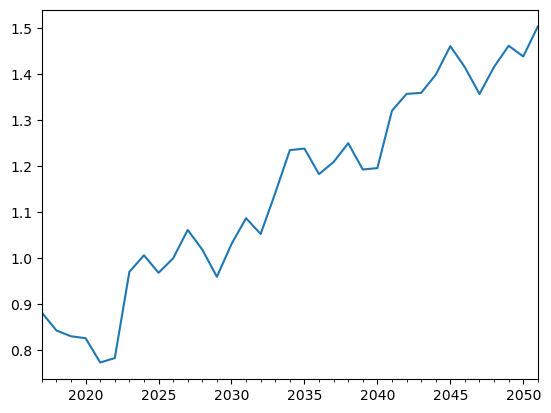

In [148]:
model.forecast(35).plot()

In [149]:
world_disaster.head()

,Entity,Code,Year,Disasters
0,All disasters,NaN,1900,6
1,All disasters,NaN,1901,1
2,All disasters,NaN,1902,10
3,All disasters,NaN,1903,12
4,All disasters,NaN,1904,4


In [150]:
world_disaster.Year = pd.to_datetime(world_disaster.Year, format= "%Y")

In [151]:
world_disaster.set_index(world_disaster.Year, inplace= True)

In [152]:
world_disaster.drop(columns= ["Entity", "Code", "Year"], inplace= True)

In [153]:
world_disaster.head()

,Disasters
Year,
1900-01-01,6
1901-01-01,1
1902-01-01,10
1903-01-01,12
1904-01-01,4


In [154]:
world_disaster = world_disaster.iloc[60:-1]

In [155]:
world_disaster.tail()

,Disasters
Year,
2019-01-01,413
2020-01-01,407
2021-01-01,441
2022-01-01,440
2023-01-01,410


In [156]:
world_co2.head()

,Entity,Year,Annual CO2 emissions
29769,World,1750,9305937.0
29770,World,1751,9407229.0
29771,World,1752,9505168.0
29772,World,1753,9610490.0
29773,World,1754,9733580.0


In [157]:
world_co2.tail()

,Entity,Year,Annual CO2 emissions
30037,World,2018,3.676694e+10
30038,World,2019,3.704010e+10
30039,World,2020,3.500774e+10
30040,World,2021,3.681654e+10
30041,World,2022,3.714979e+10


In [158]:
world_co2.drop(columns= "Entity", inplace= True)

C:\Users\Eugene\AppData\Local\Temp\ipykernel_18356\3942995261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_co2.drop(columns= "Entity", inplace= True)


In [159]:
world_co2.Year = pd.to_datetime(world_co2.Year, format= "%Y")

C:\Users\Eugene\AppData\Local\Temp\ipykernel_18356\3678160484.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_co2.Year = pd.to_datetime(world_co2.Year, format= "%Y")


In [160]:
world_co2.set_index(world_co2.Year, inplace= True)

In [161]:
world_co2.head()

,Year,Annual CO2 emissions
Year,,
1750-01-01,1750-01-01,9305937.0
1751-01-01,1751-01-01,9407229.0
1752-01-01,1752-01-01,9505168.0
1753-01-01,1753-01-01,9610490.0
1754-01-01,1754-01-01,9733580.0


In [162]:
world_co2.drop(columns= "Year", inplace= True)

C:\Users\Eugene\AppData\Local\Temp\ipykernel_18356\1645757753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_co2.drop(columns= "Year", inplace= True)


In [163]:
df = pd.merge(world_co2, world_disaster, on= "Year", how= "right")

In [164]:
df.head()

,Annual CO2 emissions,Disasters
Year,,
1960-01-01,9.386421e+09,40
1961-01-01,9.414383e+09,30
1962-01-01,9.746556e+09,29
1963-01-01,1.026605e+10,41
1964-01-01,1.082362e+10,61


In [165]:
temp = temp["Global average temperature anomaly relative to 1961-1990"]

In [166]:
df = pd.merge(df, temp, on= "Year", how= "left")

In [167]:
df.head()

,Annual CO2 emissions,Disasters,Global average temperature anomaly relative to 1961-1990
Year,,,
1960-01-01,9.386421e+09,40,-0.115460
1961-01-01,9.414383e+09,30,-0.020000
1962-01-01,9.746556e+09,29,-0.064043
1963-01-01,1.026605e+10,41,-0.036811
1964-01-01,1.082362e+10,61,-0.305862


In [168]:
world_sea

,Average sea level
Year,
1880,-180.236283
1881,-173.039065
1882,-191.580733
1883,-190.455727
1884,-166.597397
...,...
2016,56.330711
2017,55.112391
2018,52.083272


In [169]:
world_sea.index = pd.to_datetime(world_sea.index, format= "%Y")

In [170]:
df = pd.merge(df, world_sea, on= "Year", how= "left")

In [171]:
df.head()

,Annual CO2 emissions,Disasters,Global average temperature anomaly relative to 1961-1990,Average sea level
Year,,,,
1960-01-01,9.386421e+09,40,-0.115460,-67.830730
1961-01-01,9.414383e+09,30,-0.020000,-60.722394
1962-01-01,9.746556e+09,29,-0.064043,-66.439060
1963-01-01,1.026605e+10,41,-0.036811,-67.080727
1964-01-01,1.082362e+10,61,-0.305862,-75.997395


In [172]:
df.tail()

,Annual CO2 emissions,Disasters,Global average temperature anomaly relative to 1961-1990,Average sea level
Year,,,,
2019-01-01,3.704010e+10,413,0.891073,60.980739
2020-01-01,3.500774e+10,407,0.922921,65.999737
2021-01-01,3.681654e+10,441,0.761906,NaN
2022-01-01,3.714979e+10,440,0.801305,NaN
2023-01-01,NaN,410,1.100313,NaN


In [173]:
df = df.iloc[:-3]

In [174]:
df.isna().sum()

Annual CO2 emissions                                        0
Disasters                                                   0
Global average temperature anomaly relative to 1961-1990    0
Average sea level                                           0
dtype: int64

In [175]:
df.tail()

,Annual CO2 emissions,Disasters,Global average temperature anomaly relative to 1961-1990,Average sea level
Year,,,,
2016-01-01,3.546003e+10,349,0.932927,56.330711
2017-01-01,3.602546e+10,364,0.845174,55.112391
2018-01-01,3.676694e+10,323,0.762654,52.083272
2019-01-01,3.704010e+10,413,0.891073,60.980739
2020-01-01,3.500774e+10,407,0.922921,65.999737


Saving to csv for easier use

In [177]:
df.to_csv("model_data.csv", index= True)

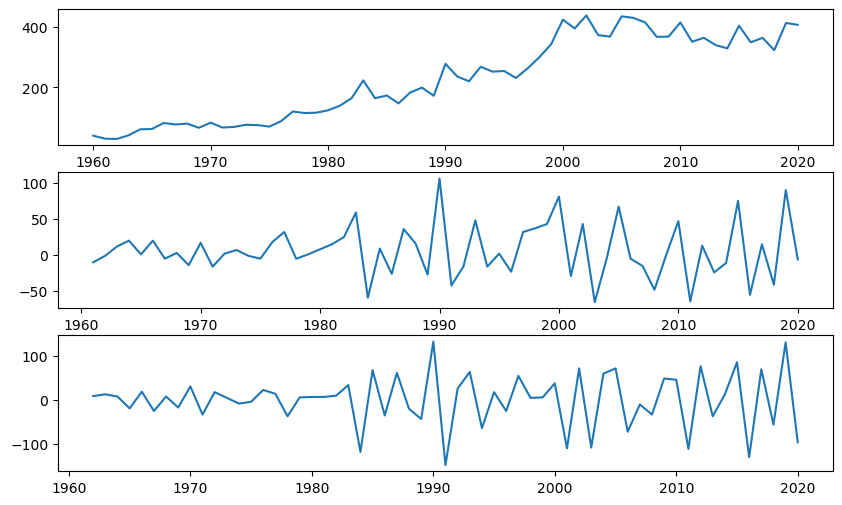

In [178]:
plot_diff(df["Disasters"]);

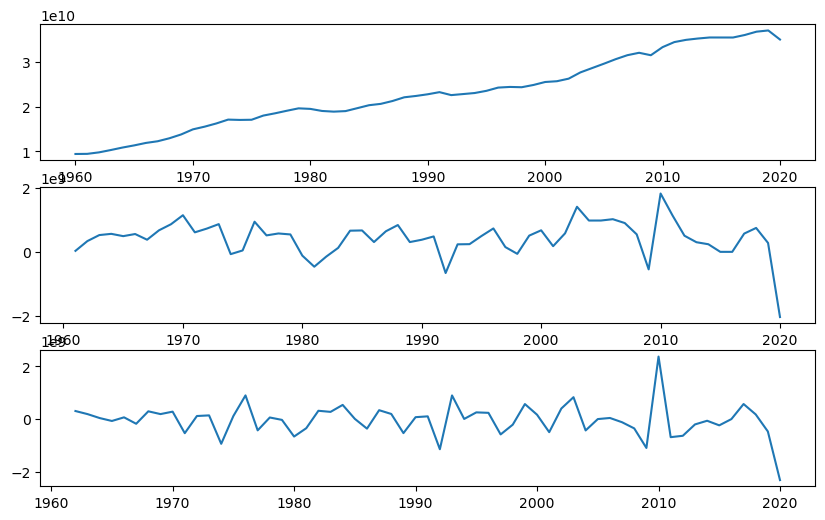

In [179]:
plot_diff(df["Annual CO2 emissions"]);

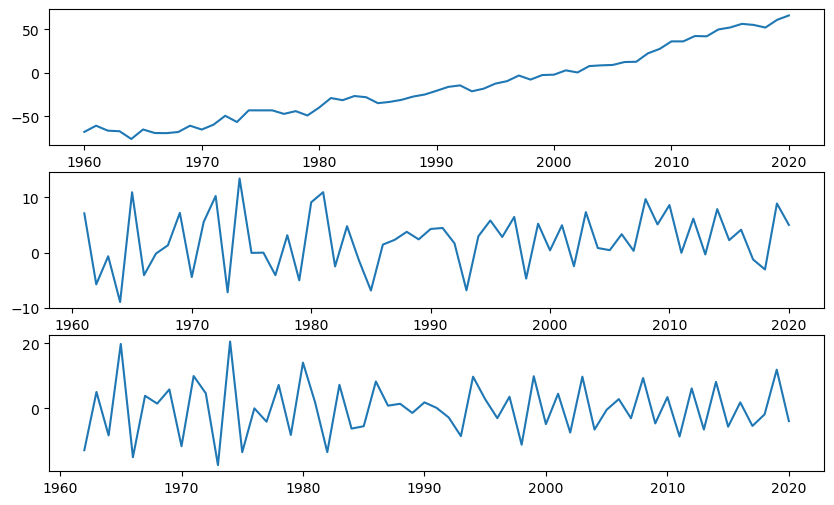

In [180]:
plot_diff(df["Average sea level"]);

They all show only one diff needed to achieve stationarity

In [182]:
df.head(1)

,Annual CO2 emissions,Disasters,Global average temperature anomaly relative to 1961-1990,Average sea level
Year,,,,
1960-01-01,9.386421e+09,40,-0.11546,-67.83073


In [183]:
df_var_diff = pd.DataFrame({
    "Annual CO2 emissions": df["Annual CO2 emissions"].diff().dropna(),
    "Global average temperature anomaly relative to 1961-1990": df["Global average temperature anomaly relative to 1961-1990"].diff().dropna()
})

df_var_diff.dropna(inplace=True)

In [184]:
var1 = VAR(df_var_diff).fit(maxlags= 15, ic= "aic")

C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [185]:
var1.k_ar

15

In [186]:
var1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 22, Aug, 2024
Time:                     14:48:33
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    38.5138
Nobs:                     45.0000    HQIC:                   36.9525
Log likelihood:          -876.257    FPE:                8.27795e+15
AIC:                      36.0246    Det(Omega_mle):     2.90215e+15
--------------------------------------------------------------------
Results for equation Annual CO2 emissions
                                                                     coefficient         std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------------------
const                                                           270908870.734171   332546165.014745    

lowest aic, 36.02

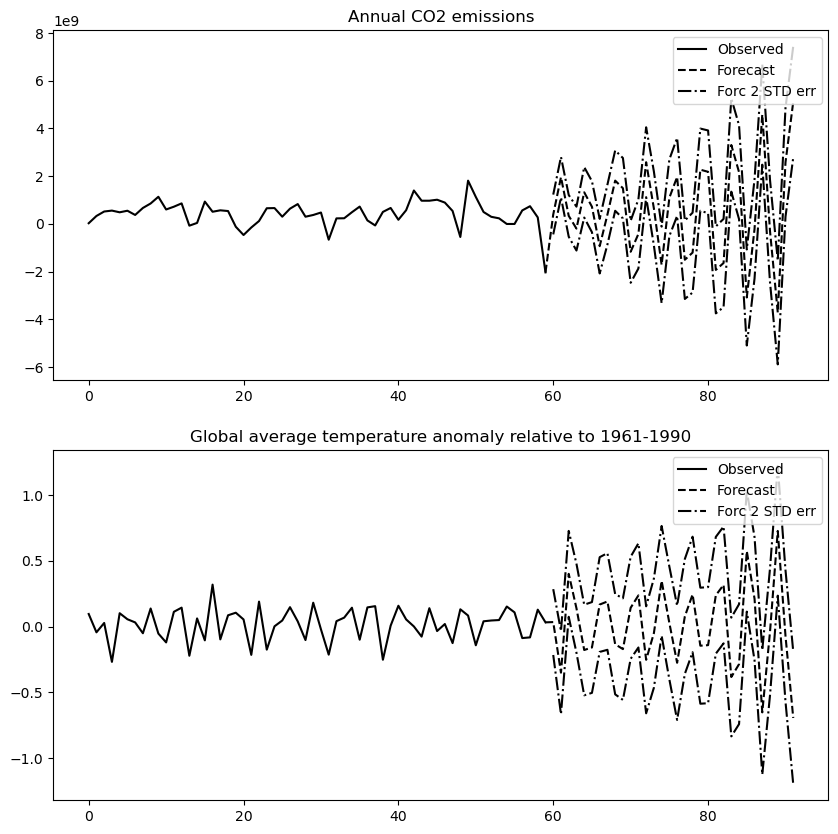

In [188]:
var1.plot_forecast(32);

In [189]:
forecast_diff1 = var1.forecast(df_var_diff.values[-var1.k_ar:], 32)
forecast_index1 = pd.date_range(start= df.index[-1] + pd.DateOffset(years= 1), periods= 32, freq= "A")
forecast_diff_df1 = pd.DataFrame(forecast_diff1, index=forecast_index1, columns= df_var_diff.columns)
forecast1 = forecast_diff_df1.cumsum() + df.iloc[-1]
forecast1.index = forecast_index1

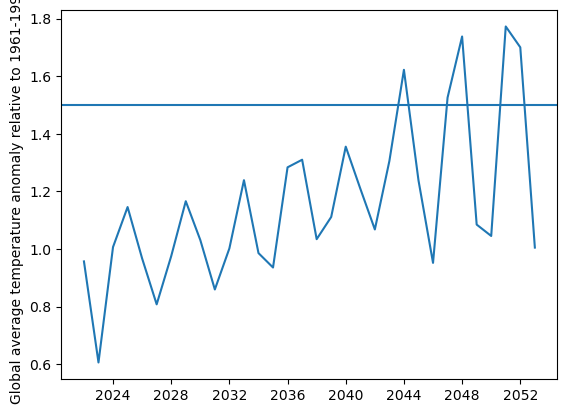

In [190]:
sns.lineplot(forecast1["Global average temperature anomaly relative to 1961-1990"])
plt.axhline(1.5)

<Axes: xlabel='Year', ylabel='Global average temperature anomaly relative to 1961-1990'>

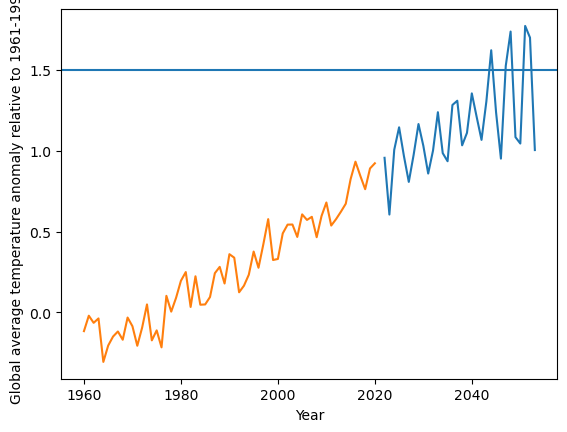

In [191]:
sns.lineplot(forecast1["Global average temperature anomaly relative to 1961-1990"])
plt.axhline(1.5)
sns.lineplot(df["Global average temperature anomaly relative to 1961-1990"])

I realised that it was better to prove the temp with just the CO2, as that was the aim, to prove the link, below would be everything else for disaster and sea level, for effect

In [193]:
df_var_diff = pd.DataFrame({
    "Annual CO2 emissions": df["Annual CO2 emissions"].diff().dropna(),
    "Disasters": df["Disasters"].diff().dropna(),
    "Global average temperature anomaly relative to 1961-1990": df["Global average temperature anomaly relative to 1961-1990"].diff().dropna(),
    "Average sea level": df["Average sea level"].diff().dropna()
})

df_var_diff.dropna(inplace=True)

In [194]:
var = VAR(df_var_diff).fit(maxlags= 11, ic= "aic")

C:\Users\Eugene\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [195]:
var.k_ar

11

In [196]:
var.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 22, Aug, 2024
Time:                     14:48:34
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    46.6325
Nobs:                     49.0000    HQIC:                   42.3196
Log likelihood:          -1070.34    FPE:                3.36996e+19
AIC:                      39.6830    Det(Omega_mle):     2.48827e+18
--------------------------------------------------------------------
Results for equation Annual CO2 emissions
                                                                     coefficient         std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------------------
const                                                           -58258205.326001   287181012.301956    

var aic = 39.68, Also very low

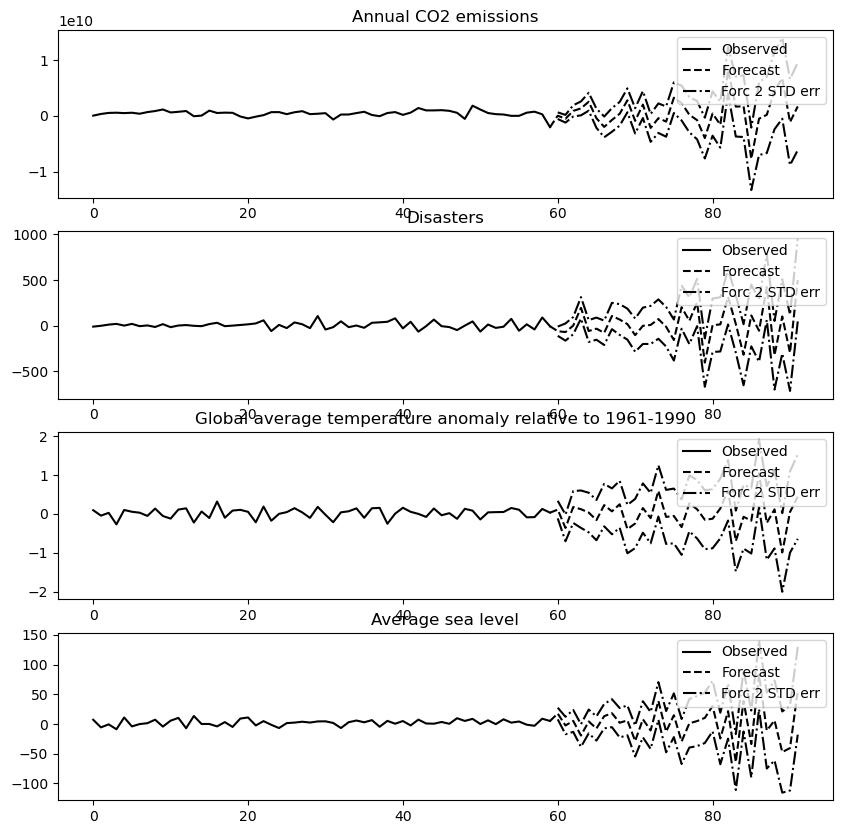

In [198]:
var.plot_forecast(32);

Looked up how to add back the forecast onto original data

In [200]:
forecast_diff = var.forecast(df_var_diff.values[-var.k_ar:], 32)

Forecast values based on the max lags chosen as well

In [202]:
forecast_index = pd.date_range(start= df.index[-1] + pd.DateOffset(years= 1), periods= 32, freq= "A")

creating the index for the future forecast dataframe, starts where where we left off, in annual frequency, with limit of 32, which is what we set the forecast to

In [204]:
forecast_diff_df = pd.DataFrame(forecast_diff, index=forecast_index, columns= df_var_diff.columns)

create dateframe

In [206]:
forecast = forecast_diff_df.cumsum() + df.iloc[-1]

Adding back the forecast onto the original scale of data

In [208]:
forecast.index = forecast_index

In [209]:
forecast.head()

,Annual CO2 emissions,Disasters,Global average temperature anomaly relative to 1961-1990,Average sea level
2021-12-31,3.503219e+10,346.656037,1.033711,83.587255
2022-12-31,3.450954e+10,277.079884,0.673048,81.041723
2023-12-31,3.539390e+10,278.061308,0.850638,86.237690
2024-12-31,3.672370e+10,473.646634,0.972324,66.766285
2025-12-31,3.924521e+10,415.369909,1.007428,71.008568


Text(0.5, 1.0, 'Future Sea Level')

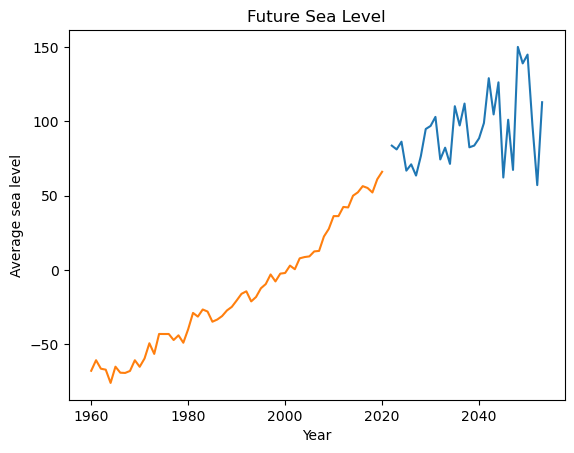

In [210]:
sns.lineplot(forecast["Average sea level"])
sns.lineplot(df["Average sea level"])
plt.title("Future Sea Level")

Text(0.5, 1.0, 'Future Disasters')

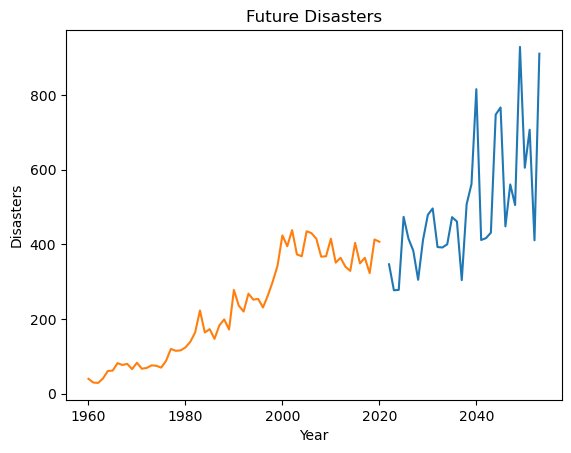

In [211]:
sns.lineplot(forecast["Disasters"])
sns.lineplot(df["Disasters"])
plt.title("Future Disasters")

Whilst some odd seasonality seems to have been introduced, perhaps something we cannot plainly see, It seems to maintian the general trajectory.
But, this is forecasting with additional variables, so this is what we assume is going on

## The Players

In [214]:
world_co2.tail()

,Annual CO2 emissions
Year,
2018-01-01,3.676694e+10
2019-01-01,3.704010e+10
2020-01-01,3.500774e+10
2021-01-01,3.681654e+10
2022-01-01,3.714979e+10


In [215]:
co2.head()

,Entity,Year,Annual CO2 emissions
0,Afghanistan,1949,14656.0
1,Afghanistan,1950,84272.0
2,Afghanistan,1951,91600.0
3,Afghanistan,1952,91600.0
4,Afghanistan,1953,106256.0


In [216]:
top20 = ["China", "North America", "India", "Russia", "Japan", "Indonesia", "Iran",\
         "Saudi Arabia", "South Korea", "Canada", "European Union (27)", "United Kingdom"]

In [217]:
top20_co2 = co2[co2["Entity"].isin(top20)]

In [218]:
top20_co2.head()

,Entity,Year,Annual CO2 emissions
5383,Canada,1785,3664.0
5384,Canada,1786,3664.0
5385,Canada,1787,3664.0
5386,Canada,1788,3664.0
5387,Canada,1789,3664.0


Text(0.5, 1.0, 'CO2 emission by proportion')

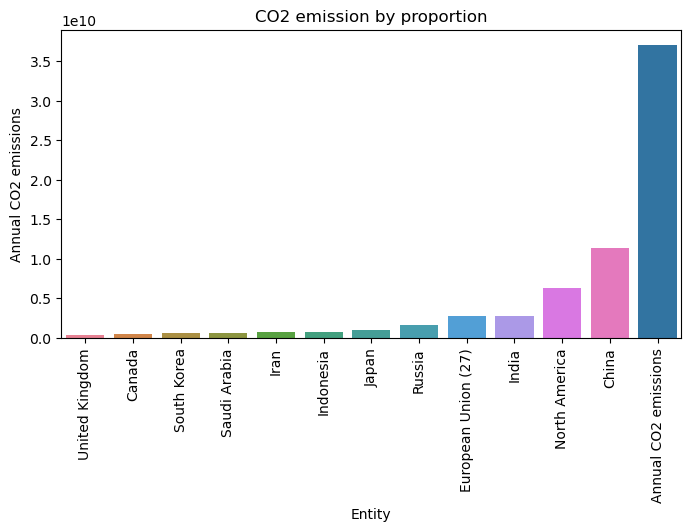

In [219]:
plt.figure(figsize= (8, 4))
sns.barplot(top20_co2[top20_co2["Year"] == 2022].sort_values("Annual CO2 emissions"), x= "Entity", y= "Annual CO2 emissions", hue= "Entity")
plt.xticks(rotation= 90)
sns.barplot(world_co2.tail(1))
plt.title("CO2 emission by proportion")

In [220]:
top20_co2[top20_co2["Year"] == 2022]["Annual CO2 emissions"].sum()/(world_co2.tail(1)["Annual CO2 emissions"])

Year
2022-01-01    0.794719
Name: Annual CO2 emissions, dtype: float64

In [221]:
nat_death = pd.read_csv("Data/natural-disasters.csv")
nat_death.head()

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,...,total_damages_pct_gdp_wet_mass_movement,deaths_all_disasters_excluding_earthquakes,deaths_all_disasters_excluding_extreme_temperature,deaths_glacial_lake_outburst_flood,deaths_wet_mass_movement,deaths_rate_per_100k_all_disasters_excluding_earthquakes,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature,deaths_rate_per_100k_glacial_lake_outburst_flood,deaths_rate_per_100k_storm,deaths_rate_per_100k_wet_mass_movement
0,Afghanistan,1900,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Afghanistan,1910,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Afghanistan,1920,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Afghanistan,1930,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Afghanistan,1940,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [222]:
nat_death = nat_death[nat_death["Year"] == 2020]

In [223]:
nat_death.head()

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,...,total_damages_pct_gdp_wet_mass_movement,deaths_all_disasters_excluding_earthquakes,deaths_all_disasters_excluding_extreme_temperature,deaths_glacial_lake_outburst_flood,deaths_wet_mass_movement,deaths_rate_per_100k_all_disasters_excluding_earthquakes,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature,deaths_rate_per_100k_glacial_lake_outburst_flood,deaths_rate_per_100k_storm,deaths_rate_per_100k_wet_mass_movement
12,Afghanistan,2020,0.0,0.0,2200000.0,0.0,2200000.0,0,0,0.0,...,0.0,266.4,929.2,0.0,17.2,0.655869,2.239046,0.0,0.006671,0.042032
25,Africa,2020,493.0,0.0,34528116.0,0.0,34528116.0,0,0,376600000.0,...,0.0,5101.2,5690.4,0.0,54.0,0.352612,0.392954,0.0,0.197332,0.003725
38,Albania,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,70.4,0.0,0.0,0.0,2.476852,0.000000,0.0,0.000000,0.000000
51,Algeria,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,37.8,37.8,0.0,0.0,0.084646,0.084646,0.0,0.000000,0.000000
64,American Samoa,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000


In [224]:
nat_death.sort_values("deaths_rate_per_100k_all_disasters_excluding_earthquakes", ascending= False).head(30)

,Country name,Year,Number of deaths from drought,Number of people injured from drought,Number of people affected from drought,Number of people left homeless from drought,Number of total people affected by drought,Reconstruction costs from drought,Insured damages against drought,Total economic damages from drought,...,total_damages_pct_gdp_wet_mass_movement,deaths_all_disasters_excluding_earthquakes,deaths_all_disasters_excluding_extreme_temperature,deaths_glacial_lake_outburst_flood,deaths_wet_mass_movement,deaths_rate_per_100k_all_disasters_excluding_earthquakes,deaths_rate_per_100k_all_disasters_excluding_extreme_temperature,deaths_rate_per_100k_glacial_lake_outburst_flood,deaths_rate_per_100k_storm,deaths_rate_per_100k_wet_mass_movement
1481,Libya,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,2470.4,2470.4,0.0,0.0,35.863220,35.863220,0.000000,35.863220,0.000000
1299,Italy,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,3616.8,14.8,2.2,3.2,6.126256,0.025046,0.003726,0.008113,0.005413
1026,Greece,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,628.4,10.6,0.0,0.0,6.051168,0.102130,0.000000,0.000000,0.000000
2534,Spain,2020,0.0,0.0,5200.0,0.0,5200.0,0,60000000,4.800000e+08,...,0.000000,2271.4,6.6,0.0,0.0,4.776038,0.013916,0.000000,0.010969,0.000000
2144,Portugal,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,443.0,0.6,0.0,0.0,4.313175,0.005842,0.000000,0.000000,0.000000
246,Belgium,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,445.4,8.6,0.0,0.0,3.845948,0.074030,0.000000,0.006855,0.000000
389,Bulgaria,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,257.0,1.6,0.0,0.0,3.789800,0.023924,0.000000,0.011962,0.000000
623,Croatia,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,146.4,2.0,0.0,0.0,3.632456,0.048925,0.000000,0.004989,0.000000
1624,Malta,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,15.2,0.0,0.0,0.0,2.850215,0.000000,0.000000,0.000000,0.000000
1494,Lithuania,2020,0.0,0.0,0.0,0.0,0.0,0,0,0.000000e+00,...,0.000000,76.2,0.0,0.0,0.0,2.770851,0.000000,0.000000,0.000000,0.000000


Text(0.5, 1.0, 'Deaths from Natural Disasters -Earthquakes')

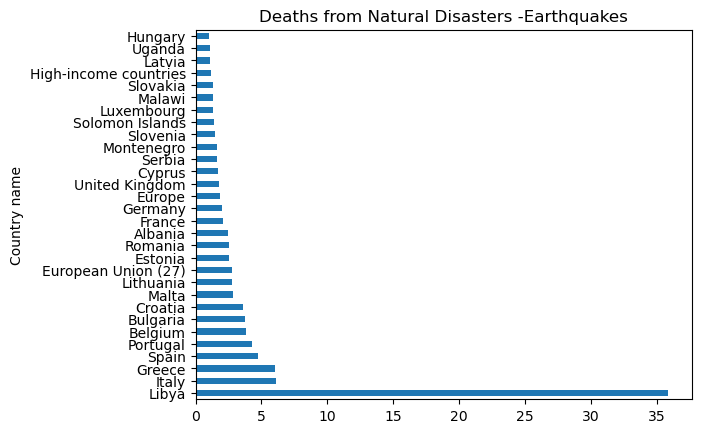

In [225]:
nat_death.set_index("Country name").sort_values("deaths_rate_per_100k_all_disasters_excluding_earthquakes", ascending= False)["deaths_rate_per_100k_all_disasters_excluding_earthquakes"].head(30).plot(kind= "barh")
plt.ylabel("Country name")
plt.title("Deaths from Natural Disasters -Earthquakes")

You can see that as you would otherwise think, that deaths, as opposed to just rising temperatures, affect a variety of nations, but mainly the higher income/developed nations as a whole.
So to think that we are safe from the effects would be naive.

In [227]:
max_temp.sort_values(ascending= False).head(100).index

MultiIndex([(        'Burkina Faso', 2024),
            (         'South Sudan', 2024),
            (                'Mali', 2024),
            (             'Senegal', 2024),
            (            'Djibouti', 2024),
            (                'Mali', 2021),
            (                'Mali', 2010),
            (               'Benin', 2024),
            (                'Mali', 2023),
            (                'Chad', 2024),
            (             'Senegal', 2021),
            (             'Senegal', 2023),
            (        'Burkina Faso', 2021),
            (            'Djibouti', 2023),
            (             'Senegal', 2020),
            (        'Burkina Faso', 2023),
            (               'Niger', 2024),
            (             'Senegal', 1998),
            (                'Mali', 2016),
            (               'Ghana', 2024),
            (             'Senegal', 2010),
            (                'Mali', 2020),
            (         'South Sud

You really notice a collection of countries, a lack of and only inclusion of UAE, which makes sense since it is oil and middle eastern nation

Now finally, the import export, co2 per capita, and co2 change

In [230]:
change = pd.read_csv("Data/change-co2-annual-pct.csv")
change.head()

,Entity,Code,Year,Annual CO₂ emissions growth (%)
0,Afghanistan,AFG,1950,475.000000
1,Afghanistan,AFG,1951,8.695650
2,Afghanistan,AFG,1952,0.000000
3,Afghanistan,AFG,1953,15.999996
4,Afghanistan,AFG,1954,0.000000


In [231]:
change.drop(columns= "Code", inplace= True)

In [232]:
changetop30 = change[change["Year"].isin([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])].groupby("Entity").mean().sort_values("Annual CO₂ emissions growth (%)").head(30)

In [233]:
changebot30 = change[change["Year"].isin([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])].groupby("Entity").mean().sort_values("Annual CO₂ emissions growth (%)").tail(30)

Text(0.5, 1.0, 'Reduction in CO2')

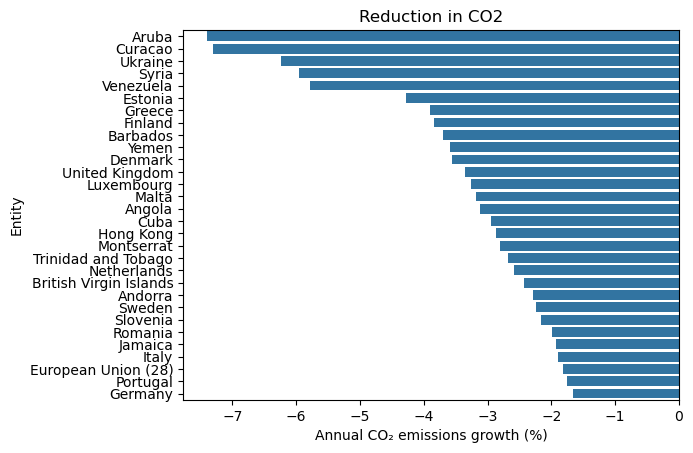

In [234]:
sns.barplot(changetop30, x= "Annual CO₂ emissions growth (%)", y= "Entity")
plt.title("Reduction in CO2")

Text(0.5, 1.0, 'Increase in CO2')

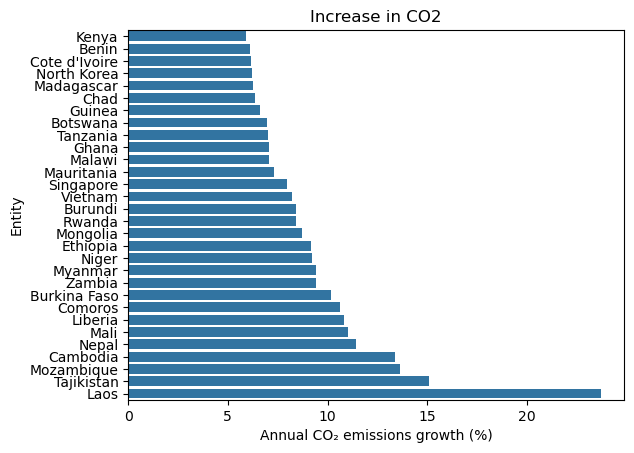

In [235]:
sns.barplot(changebot30, x= "Annual CO₂ emissions growth (%)", y= "Entity")
plt.title("Increase in CO2")

In [236]:
impex = pd.read_csv("Data/imported-or-exported-co-emissions-per-capita.csv")
impex.head()

,Entity,Code,Year,Annual CO₂ emissions embedded in trade (per capita)
0,Africa,NaN,1990,-0.118572
1,Africa,NaN,1991,-0.123041
2,Africa,NaN,1992,-0.069141
3,Africa,NaN,1993,-0.091760
4,Africa,NaN,1994,-0.104840


In [237]:
impex.drop(columns= "Code", inplace= True)

Text(0.5, 1.0, 'Exporters')

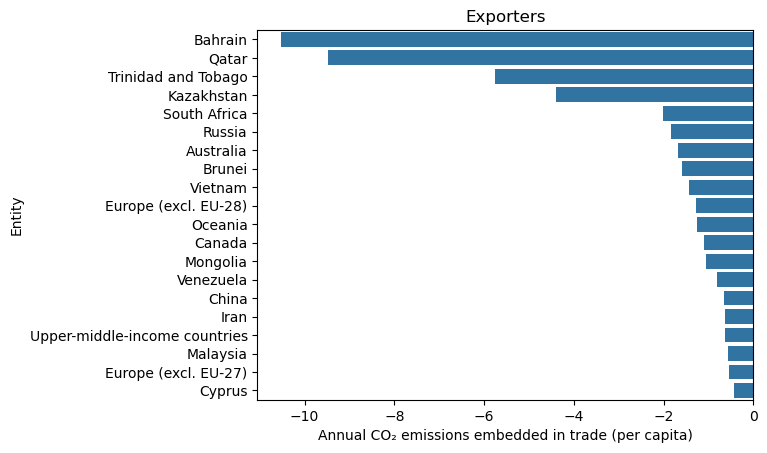

In [238]:
sns.barplot(impex[impex["Year"] == 2020].sort_values("Annual CO₂ emissions embedded in trade (per capita)").head(20), x= "Annual CO₂ emissions embedded in trade (per capita)", y= "Entity")
plt.title("Exporters")

Text(0.5, 1.0, 'Importers')

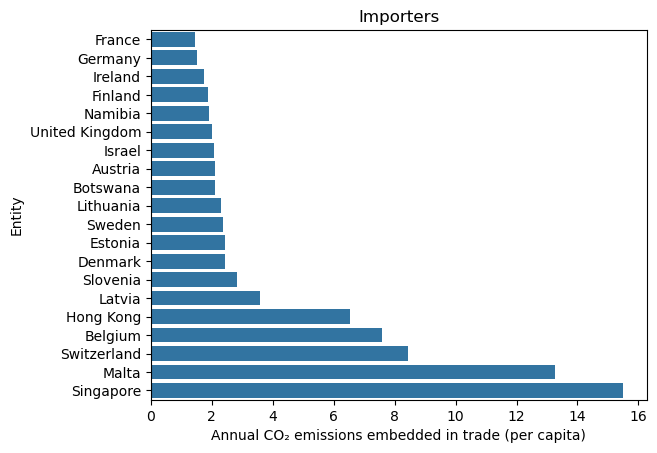

In [239]:
sns.barplot(impex[impex["Year"] == 2020].sort_values("Annual CO₂ emissions embedded in trade (per capita)").tail(20),  x= "Annual CO₂ emissions embedded in trade (per capita)", y= "Entity")
plt.title("Importers")

This data set is in just tonnes, not mega tonnes

In [241]:
co2per = pd.read_csv("Data/co-emissions-per-capita.csv")
co2per.head()

,Entity,Code,Year,Annual CO₂ emissions (per capita)
0,Afghanistan,AFG,1949,0.001992
1,Afghanistan,AFG,1950,0.011266
2,Afghanistan,AFG,1951,0.012098
3,Afghanistan,AFG,1952,0.011946
4,Afghanistan,AFG,1953,0.013685


In [2]:
#renew = pd.read_csv("Data/annual-change-renewables.csv")
#renew.head()

## Other Problems with fossil fuels

In [ ]:
bce = pd.read_csv("Data/air-pollution.csv")
bce.head()

In [ ]:
bce.drop(columns= "Code", inplace= True)

In [ ]:
bce.head()

In [ ]:
bce.tail()

In [ ]:
bce_region = bce.groupby(["Entity", "Year"], as_index= False).sum()

In [ ]:
bce_region.head()

In [ ]:
bce_region.sort_values("Black carbon (BC) emissions", ascending= False).head()

In [ ]:
sns.lineplot(bce_region, x= "Year", y= "Black carbon (BC) emissions", hue= "Entity", legend= False)

Whilst we see some decrease, realistically these are richer nations and non-industrialising/developing

In [ ]:
bce_region[bce_region["Year"] == 2022].sort_values("Black carbon (BC) emissions", ascending= False).head(20)

In [ ]:
bce_increase = bce_region[bce_region["Entity"].isin(["Lower-middle-income countries", "Africa", "India", "Low-income countries",\
                                    "South America", "Nigeria", "Pakistan", "Brazil", "United states", "Thailand", "Iran"])]

In [ ]:
sns.lineplot(bce_increase, x= "Year", y= "Black carbon (BC) emissions", hue= "Entity")

I realised that I tried including a bit too much data/eda for the size of this capstone

Whilst there were many more things I could explore, which I shall outline in the considerations, I believe it would be time inefficient for the size of this capstone